In [31]:
import pandas as pd
import numpy as np
import re, sys, xlrd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def readFile(infile):
    matrix=[]
    for i in open(infile, 'r'):
        if i[:3]=='sgd':
            line = i.strip().split(' ')
            matrix.append(np.insert([j for j in line[1:]],0,line[0][4:11]))
    df = pd.DataFrame(matrix)
    df.columns = ['locus', 'LogRatio', 'LogRatioError', 'PValueLogRatio']
    df.set_index('locus', inplace=True)
    return df

GSM65 = readFile('GSM1086265.csv')
GSM65.head()
#df = pd.read_csv('GSM1086265.csv', header=None, delimiter=r"\s+")
#df = pd.concat([df.ix[8:,4],df.ix[8:,18:21]], axis=1)
#df.columns = df.iloc[0].as_matrix()
#df = df.iloc[4:]
#df = df.reset_index().ix[:,1:]
#df = df[df.accessions.str[:3]=='sgd']
#df.loc[:,'locus'] = df.loc[:,'accessions'].str[4:11]
#df = df.ix[:,1:]
#df

,LogRatio,LogRatioError,PValueLogRatio
locus,,,
YLR220W,-2.84E-01,6.67E-02,2.01E-05
YDR223W,-9.90E-01,1.11E-01,6.22E-19
YMR077C,-5.00E-02,6.20E-02,4.20E-01
YFR055W,-8.94E-01,1.03E-01,4.95E-18
YPR021C,-1.21E-01,6.24E-02,5.22E-02


In [3]:
for i in GSM65.index:
    matriz=[]
    matriz.append(GSM65.loc[i,'LogRatio'].values)
    GSM65.loc[i,'LogRatioMean'] = matriz[0].astype(float).mean()
    #if len(matriz)>0:
    #    print 'JOYAAAAA!!!'
   

In [5]:
GSM65

,LogRatio,LogRatioError,PValueLogRatio,LogRatioMean
locus,,,,
YLR220W,-2.84E-01,6.67E-02,2.01E-05,-0.280000
YDR223W,-9.90E-01,1.11E-01,6.22E-19,-0.946667
YMR077C,-5.00E-02,6.20E-02,4.20E-01,-0.075333
YFR055W,-8.94E-01,1.03E-01,4.95E-18,-0.912000
YPR021C,-1.21E-01,6.24E-02,5.22E-02,-0.145000
YNL164C,1.50E-01,6.29E-02,1.72E-02,0.127000
YPR004C,2.65E-03,6.14E-02,9.66E-01,-0.004275
YJR083C,2.38E-02,6.15E-02,6.99E-01,-0.006850
YGR159C,7.64E-01,9.36E-02,3.43E-16,0.757000


In [6]:
Pol = pd.read_excel('Degron_Log2_table_140.xlsx')
Pol = Pol[['Gene_name', 'WT_SM_control_value','WT_minus_SM_control_value']]

In [7]:
for i in Pol.itertuples():
    Pol.loc[i.Index,'log'] = np.log(Pol.loc[i.Index,'WT_SM_control_value'] / Pol.loc[i.Index,'WT_minus_SM_control_value'])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [8]:
Pol.set_index('Gene_name', inplace=True)
Pol

,WT_SM_control_value,WT_minus_SM_control_value,log
Gene_name,,,
YDL065C,0.542111,0.349137,0.440007
YMR195W,18.235858,7.918071,0.834242
YNL325C,0.672478,0.917144,-0.310294
YFL013C,1.074051,0.291183,1.305241
YER113C,0.519800,0.686064,-0.277527
YPR122W,0.580464,0.445036,0.265673
YKL143W,0.852965,1.080281,-0.236258
YNL310C,1.522088,1.209934,0.229517
YPL236C,0.280803,0.183233,0.426893


In [9]:
df = GSM65.join(Pol)#pd.concat([GSM65,Pol], axis=1)
df.dropna(inplace=True)

In [10]:
df = df[['LogRatioMean','log']]
grouped = df.groupby(level=0)
df = grouped.last()

In [11]:
df

,LogRatioMean,log
YAL001C,-0.357500,0.337405
YAL002W,-0.191333,-0.003393
YAL003W,0.455500,0.700628
YAL005C,-0.056900,0.118669
YAL007C,0.352500,0.048367
YAL008W,-0.117667,0.220165
YAL009W,-0.073333,0.303134
YAL010C,0.106800,1.055073
YAL011W,0.071400,0.198684
YAL012W,0.196500,0.283000


R = -0.16


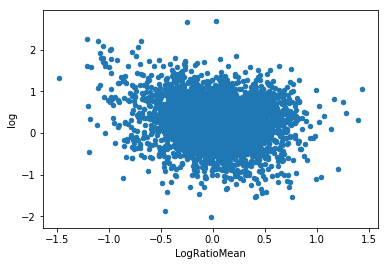

In [25]:
df.plot.scatter(x='LogRatioMean',y='log')
print 'R = '+'{:.2f}'.format(np.corrcoef(df.LogRatioMean,df.log)[0][1])

There is no correlation between Linda's and Malinka's results. This is if I used the correct values from linda's table.

In [57]:
for i in df.itertuples():
    df.loc[i.Index,'diff'] = np.log(df.loc[i.Index, 'LogRatioMean'] / df.loc[i.Index, 'log'])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


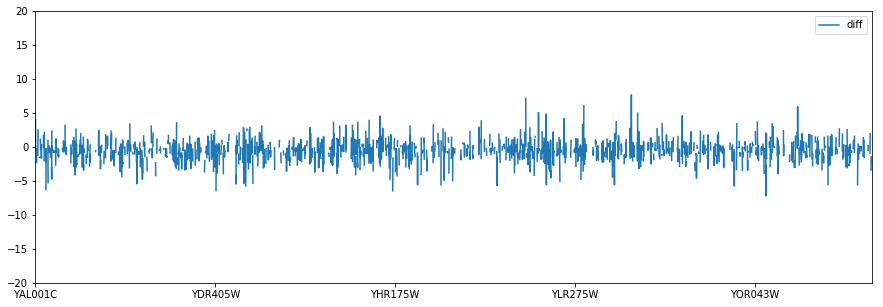

In [61]:
plt.figure()
df[['diff']].plot(ylim=[-20,20], figsize=(15,5))